<a href="https://colab.research.google.com/github/Woongheelee7/Leon/blob/main/DS_Group_Project_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List
from typing import Tuple
from typing import Union
import os
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})
#2020-2021 data
data_1 = pd.read_csv("https://raw.githubusercontent.com/jj2683/datascience/main/spotify_dataset.csv")
data_1.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [3]:
#dropping irrelevant columns
df1 = data_1.drop(['Index','Highest Charting Position','Number of Times Charted','Week of Highest Charting','Release Date','Song ID','Weeks Charted','Chord'], axis=1)
df1.head()

,Song Name,Streams,Artist,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,Beggin',"48,633,449",Måneskin,3377762,"['indie rock italiano', 'italian pop']",100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,['australian hip hop'],99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,good 4 u,"40,162,559",Olivia Rodrigo,6266514,['pop'],99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,Bad Habits,"37,799,456",Ed Sheeran,83293380,"['pop', 'uk pop']",98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [4]:
#cheking for duplicates
df1.duplicated().any()

False

In [5]:
#checking for missing data and data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Song Name         1556 non-null   object
 1   Streams           1556 non-null   object
 2   Artist            1556 non-null   object
 3   Artist Followers  1556 non-null   object
 4   Genre             1556 non-null   object
 5   Popularity        1556 non-null   object
 6   Danceability      1556 non-null   object
 7   Energy            1556 non-null   object
 8   Loudness          1556 non-null   object
 9   Speechiness       1556 non-null   object
 10  Acousticness      1556 non-null   object
 11  Liveness          1556 non-null   object
 12  Tempo             1556 non-null   object
 13  Duration (ms)     1556 non-null   object
 14  Valence           1556 non-null   object
dtypes: object(15)
memory usage: 182.5+ KB


In [6]:
#changing object columns to float/int
object_cols = ['Artist Followers','Popularity','Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Duration (ms)','Valence']
for each_col in object_cols:
    df1[each_col] = pd.to_numeric(df1[each_col], errors='coerce')

df1.isnull().sum()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song Name         1556 non-null   object 
 1   Streams           1556 non-null   object 
 2   Artist            1556 non-null   object 
 3   Artist Followers  1545 non-null   float64
 4   Genre             1556 non-null   object 
 5   Popularity        1545 non-null   float64
 6   Danceability      1545 non-null   float64
 7   Energy            1545 non-null   float64
 8   Loudness          1545 non-null   float64
 9   Speechiness       1545 non-null   float64
 10  Acousticness      1545 non-null   float64
 11  Liveness          1545 non-null   float64
 12  Tempo             1545 non-null   float64
 13  Duration (ms)     1545 non-null   float64
 14  Valence           1545 non-null   float64
dtypes: float64(11), object(4)
memory usage: 182.5+ KB


In [7]:
#changing Streams column from comma format to number
def commas_to_number(strnum):
    strlist = str(strnum).split(',')
    strjoined = ""
    for each_literal in strlist:
        strjoined += each_literal
    return (int(strjoined))

df1['Streams'] = df1['Streams'].apply(commas_to_number)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song Name         1556 non-null   object 
 1   Streams           1556 non-null   int64  
 2   Artist            1556 non-null   object 
 3   Artist Followers  1545 non-null   float64
 4   Genre             1556 non-null   object 
 5   Popularity        1545 non-null   float64
 6   Danceability      1545 non-null   float64
 7   Energy            1545 non-null   float64
 8   Loudness          1545 non-null   float64
 9   Speechiness       1545 non-null   float64
 10  Acousticness      1545 non-null   float64
 11  Liveness          1545 non-null   float64
 12  Tempo             1545 non-null   float64
 13  Duration (ms)     1545 non-null   float64
 14  Valence           1545 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 182.5+ KB


In [8]:
#summary of numerical columns after cleaning
df1.describe()

,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1.556000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,6.340219e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,3.369479e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,4.915322e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,5.275748e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,6.455044e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


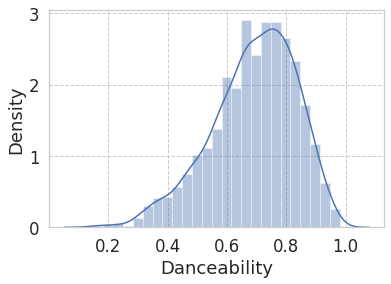

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


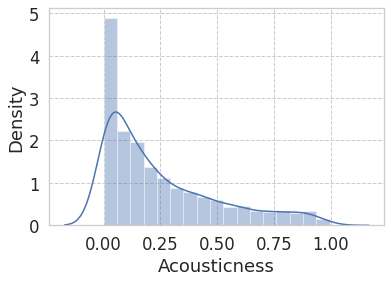

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


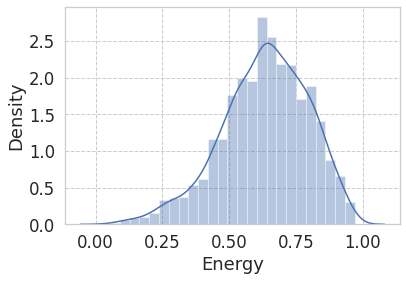

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


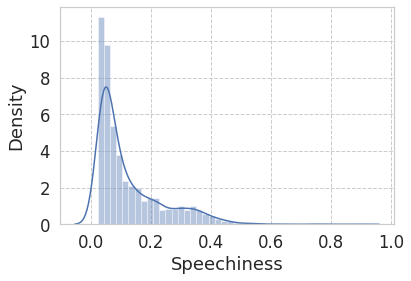

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


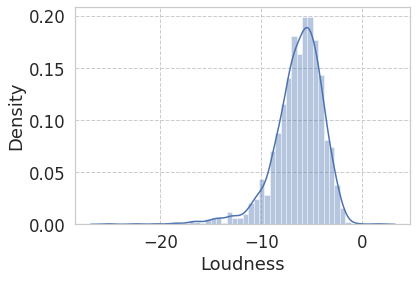

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


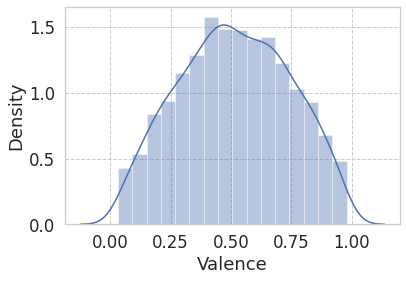

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


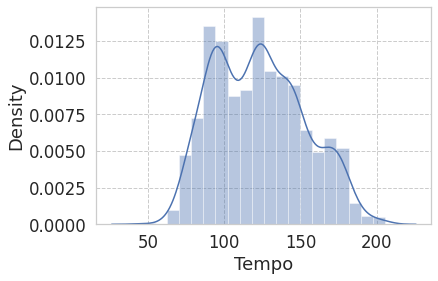

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


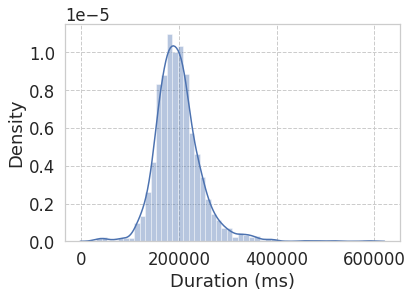

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


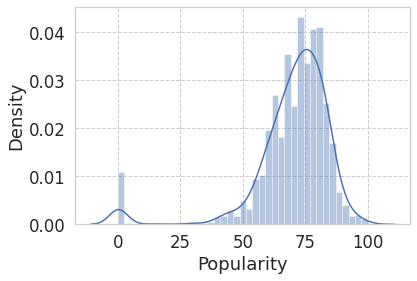

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


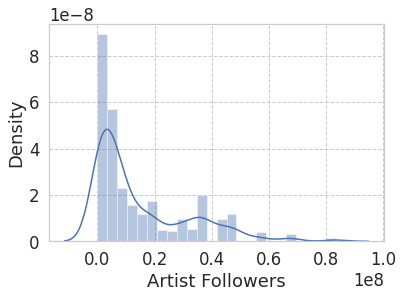

In [9]:
sns.distplot(df1['Danceability'])
plt.show()
sns.distplot(df1['Acousticness'])
plt.show()
sns.distplot(df1['Energy'])
plt.show()
sns.distplot(df1['Speechiness'])
plt.show()
sns.distplot(df1['Loudness'])
plt.show()
sns.distplot(df1['Valence'])
plt.show()
sns.distplot(df1['Tempo'])
plt.show()
sns.distplot(df1['Duration (ms)'])
plt.show()
sns.distplot(df1['Popularity'])
plt.show()
sns.distplot(df1['Artist Followers'])
plt.show()

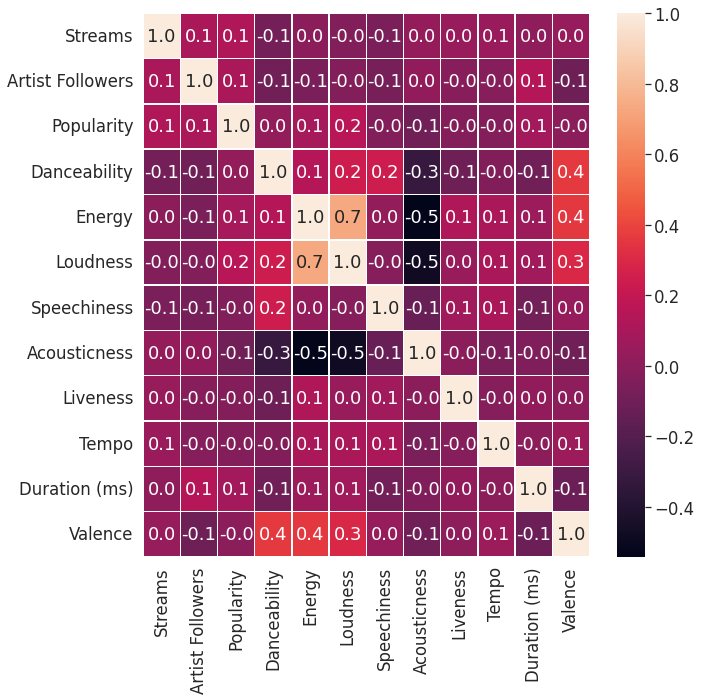

In [10]:
#Heatmap to show correleation between numerical values
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#We can see the features that are paired the most in the list of most-streamed tracks
#Loudness & energy (0.7), energy & valence (0.4), valence & danceability (0.4)

In [11]:
#2019 data
data_2 = pd.read_csv("https://raw.githubusercontent.com/jj2683/datascience/main/spotify_global_2019_most_streamed_tracks_audio_features.csv")
data_2.head()

,Country,Rank,Track_id,Streams,Track Name,Artist,URL,acousticness,danceability,energy,...,valence,tempo,time_signature,duration_ms,key,mode,Artist_id,Artist_popularity,Artist_follower,Artist_img
0,global,1.0,25sgk305KZfyuqVBQIahim,1166185736,Sweet but Psycho,Ava Max,https://open.spotify.com/track/25sgk305KZfyuqV...,0.0691,0.719,0.704,...,0.628,133.002,4,187436,1,1,4npEfmQ6YuiwW1GpUmaq3F,87,1025358,https://i.scdn.co/image/4b914c6470c8458674538a...
1,global,2.0,2Fxmhks0bxGSBdJ92vM42m,1052358787,bad guy,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,0.3280,0.701,0.425,...,0.562,135.128,4,194088,7,1,6qqNVTkY8uBg9cP3Jd7DAH,98,18867904,https://i.scdn.co/image/2622edec99d68d1d141886...
2,global,3.0,6ocbgoVGwYJhOv1GgI9NsF,789094044,7 rings,Ariana Grande,https://open.spotify.com/track/6ocbgoVGwYJhOv1...,0.5920,0.778,0.317,...,0.327,140.048,4,178627,1,0,66CXWjxzNUsdJxJ2JdwvnR,97,40958727,https://i.scdn.co/image/b1dfbe843b0b9f54ab2e58...
3,global,4.0,1rgnBhdG2JDFTbYkYRZAku,764208309,Dance Monkey,Tones and I,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,0.6880,0.825,0.593,...,0.540,98.078,4,209755,6,0,2NjfBq1NflQcKSeiDooVjY,92,484241,https://i.scdn.co/image/c128f5ef4d210a67610acd...
4,global,5.0,6v3KW9xbzN5yKLt9YKDYA2,763064359,Señorita,Shawn Mendes,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,0.0392,0.759,0.548,...,0.749,116.967,4,190800,9,0,7n2wHs1TKAczGzO7Dd2rGr,94,23152263,https://i.scdn.co/image/6bd59cfbd3e1e6394af710...


In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1717 non-null   object 
 1   Rank               1717 non-null   float64
 2   Track_id           1717 non-null   object 
 3   Streams            1717 non-null   int64  
 4   Track Name         1717 non-null   object 
 5   Artist             1717 non-null   object 
 6   URL                1717 non-null   object 
 7   acousticness       1717 non-null   float64
 8   danceability       1717 non-null   float64
 9   energy             1717 non-null   float64
 10  instrumentalness   1717 non-null   float64
 11  liveness           1717 non-null   float64
 12  loudness           1717 non-null   float64
 13  speechiness        1717 non-null   float64
 14  valence            1717 non-null   float64
 15  tempo              1717 non-null   float64
 16  time_signature     1717 

In [13]:
#dropping irrelevant columns
df2 = data_2.drop(['Country','Rank','Track_id','URL','instrumentalness','time_signature','key','mode','Artist_id','Artist_img'], axis=1)
df2.head()

,Streams,Track Name,Artist,acousticness,danceability,energy,liveness,loudness,speechiness,valence,tempo,duration_ms,Artist_popularity,Artist_follower
0,1166185736,Sweet but Psycho,Ava Max,0.0691,0.719,0.704,0.1660,-4.724,0.0476,0.628,133.002,187436,87,1025358
1,1052358787,bad guy,Billie Eilish,0.3280,0.701,0.425,0.1000,-10.965,0.3750,0.562,135.128,194088,98,18867904
2,789094044,7 rings,Ariana Grande,0.5920,0.778,0.317,0.0881,-10.732,0.3340,0.327,140.048,178627,97,40958727
3,764208309,Dance Monkey,Tones and I,0.6880,0.825,0.593,0.1700,-6.401,0.0988,0.540,98.078,209755,92,484241
4,763064359,Señorita,Shawn Mendes,0.0392,0.759,0.548,0.0828,-6.049,0.0290,0.749,116.967,190800,94,23152263


In [14]:
#checking for missing data and data type
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Streams            1717 non-null   int64  
 1   Track Name         1717 non-null   object 
 2   Artist             1717 non-null   object 
 3   acousticness       1717 non-null   float64
 4   danceability       1717 non-null   float64
 5   energy             1717 non-null   float64
 6   liveness           1717 non-null   float64
 7   loudness           1717 non-null   float64
 8   speechiness        1717 non-null   float64
 9   valence            1717 non-null   float64
 10  tempo              1717 non-null   float64
 11  duration_ms        1717 non-null   int64  
 12  Artist_popularity  1717 non-null   int64  
 13  Artist_follower    1717 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 187.9+ KB


In [15]:
df2=df2.drop(index=df2[df2['Streams']>20000000].index)
#summary of numerical columns
df2.describe()

,Streams,acousticness,danceability,energy,liveness,loudness,speechiness,valence,tempo,duration_ms,Artist_popularity,Artist_follower
count,1.053000e+03,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1.053000e+03
mean,4.846080e+06,0.263160,0.664042,0.622370,0.175360,-6.659068,0.136012,0.476009,122.528628,205571.676163,85.808167,7.206531e+06
std,5.025134e+06,0.264936,0.161510,0.179602,0.137926,2.850100,0.118700,0.225850,30.524709,66827.889461,8.006132,9.643499e+06
min,5.242300e+05,0.000037,0.151000,0.013700,0.019700,-25.166000,0.024700,0.026200,46.489000,46837.000000,47.000000,1.090000e+02
25%,8.643990e+05,0.049800,0.564000,0.520000,0.097000,-7.874000,0.044800,0.301000,97.968000,171692.000000,81.000000,1.162631e+06
50%,2.670317e+06,0.172000,0.681000,0.645000,0.123000,-6.097000,0.084100,0.475000,122.012000,196000.000000,86.000000,3.547268e+06
75%,7.221988e+06,0.392000,0.786000,0.749000,0.198000,-4.830000,0.202000,0.642000,144.019000,228373.000000,92.000000,9.208531e+06
max,1.999106e+07,0.979000,0.964000,0.978000,0.959000,-1.624000,0.856000,0.982000,207.476000,943529.000000,100.000000,5.746376e+07


In [16]:
#cheking for duplicates
df2.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


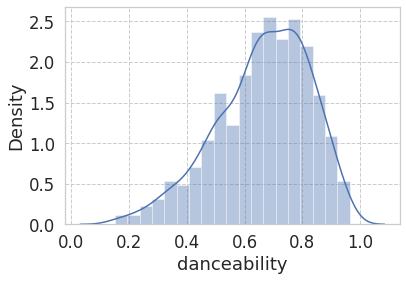

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


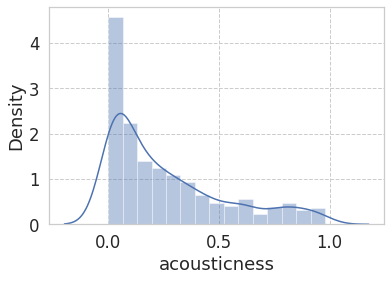

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


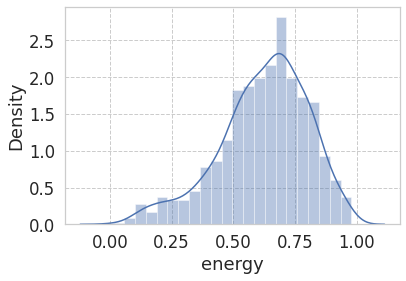

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


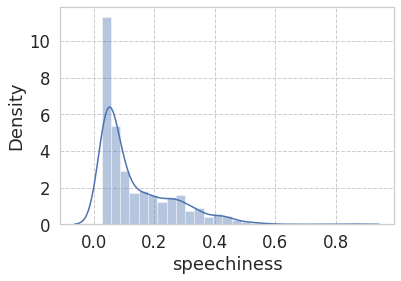

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


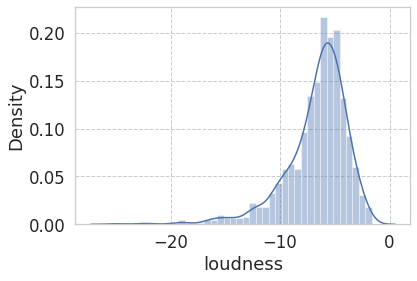

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


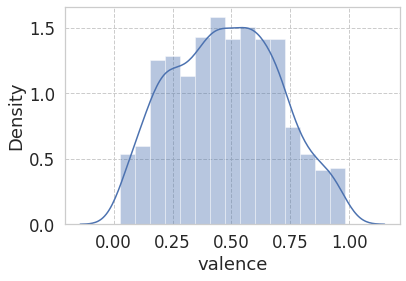

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


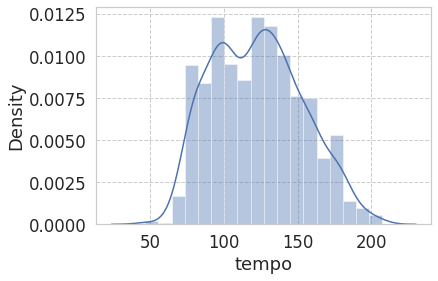

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


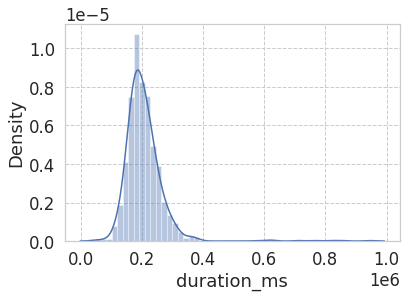

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


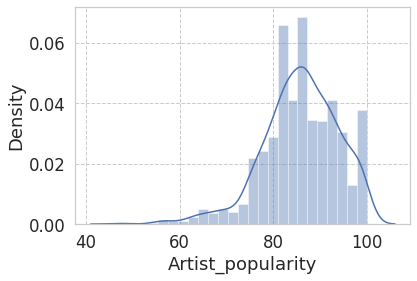

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


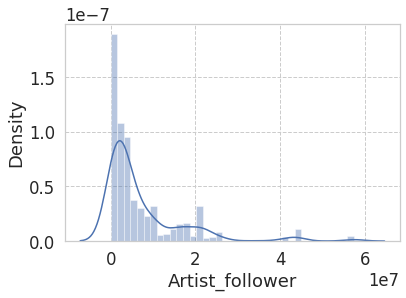

In [17]:
sns.distplot(df2['danceability'])
plt.show()
sns.distplot(df2['acousticness'])
plt.show()
sns.distplot(df2['energy'])
plt.show()
sns.distplot(df2['speechiness'])
plt.show()
sns.distplot(df2['loudness'])
plt.show()
sns.distplot(df2['valence'])
plt.show()
sns.distplot(df2['tempo'])
plt.show()
sns.distplot(df2['duration_ms'])
plt.show()
sns.distplot(df2['Artist_popularity'])
plt.show()
sns.distplot(df2['Artist_follower'])
plt.show()

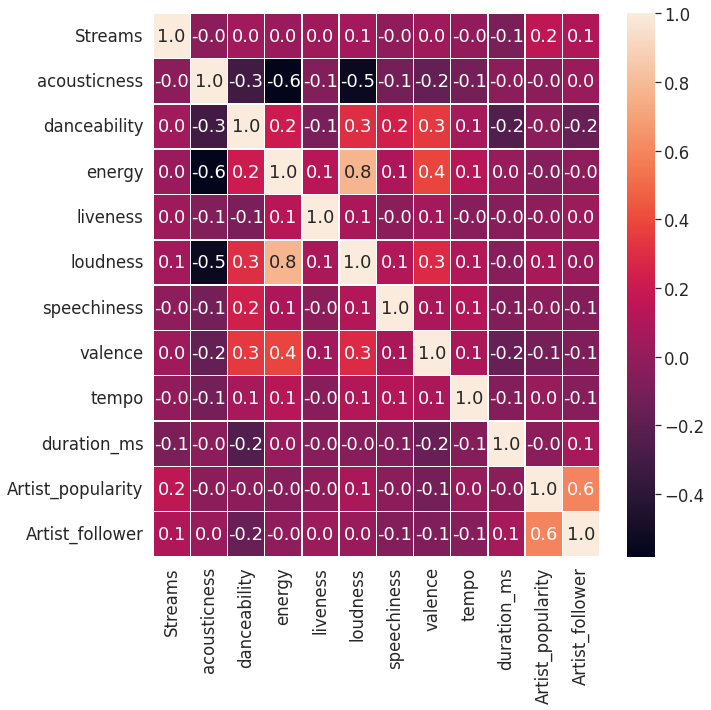

In [18]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

beta_0 is: 3824336.0261
beta_1 is: 1538674.5541
R-square is: 0.0024


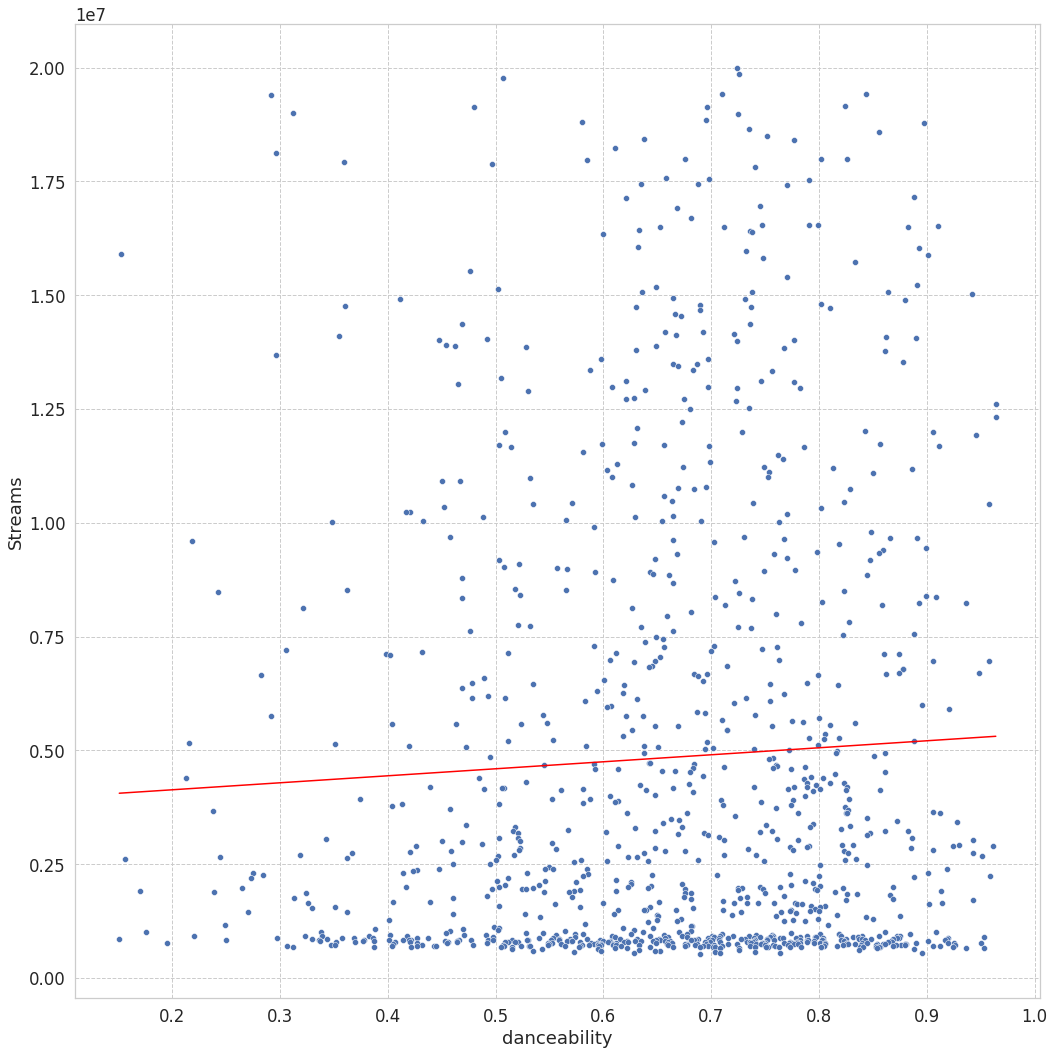

In [32]:
y = df2["Streams"]
x = df2["danceability"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="danceability", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()


beta_0 is: 4989033.9052
beta_1 is: -543220.5936
R-square is: 0.0008


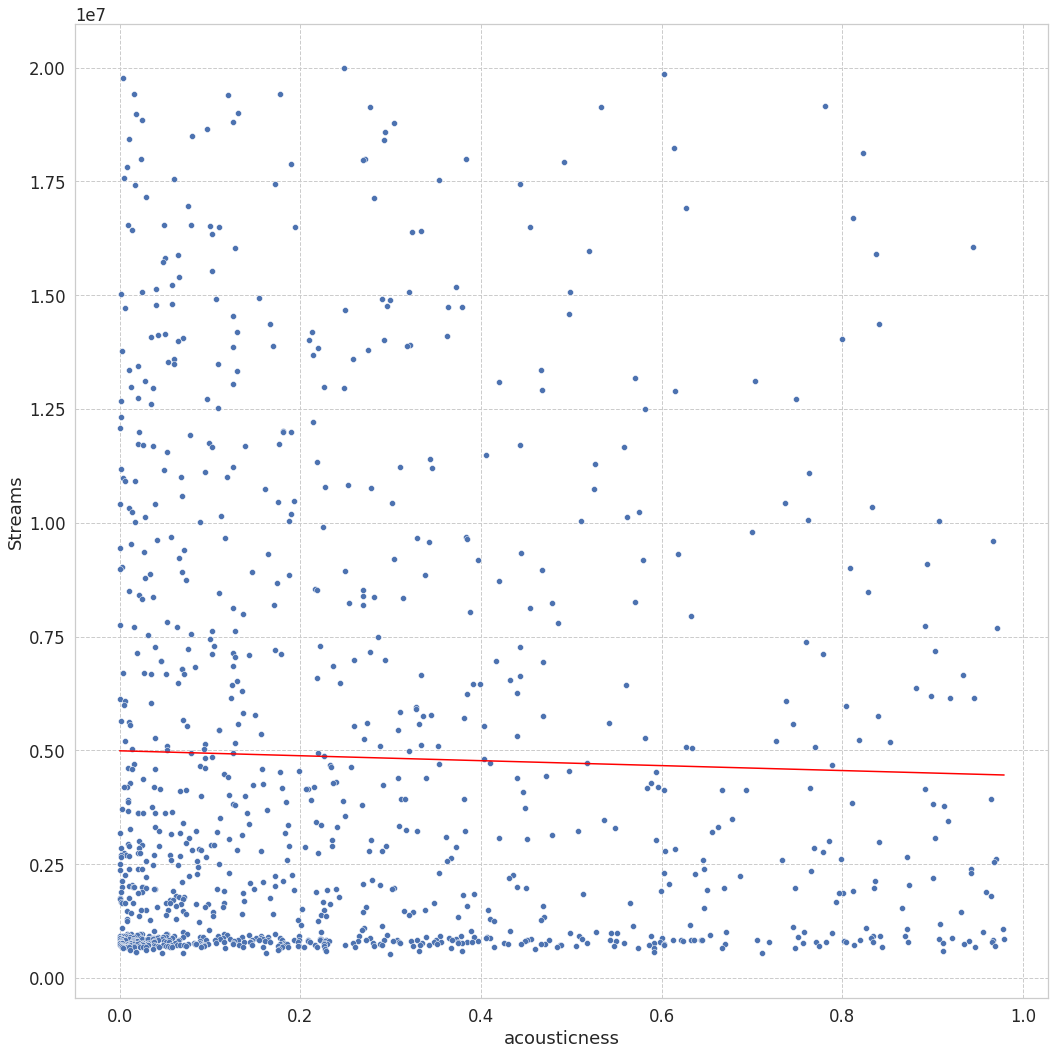

In [33]:
y = df2["Streams"]
x = df2["acousticness"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="acousticness", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 4406225.1754
beta_1 is: 706742.2749
R-square is: 0.0006


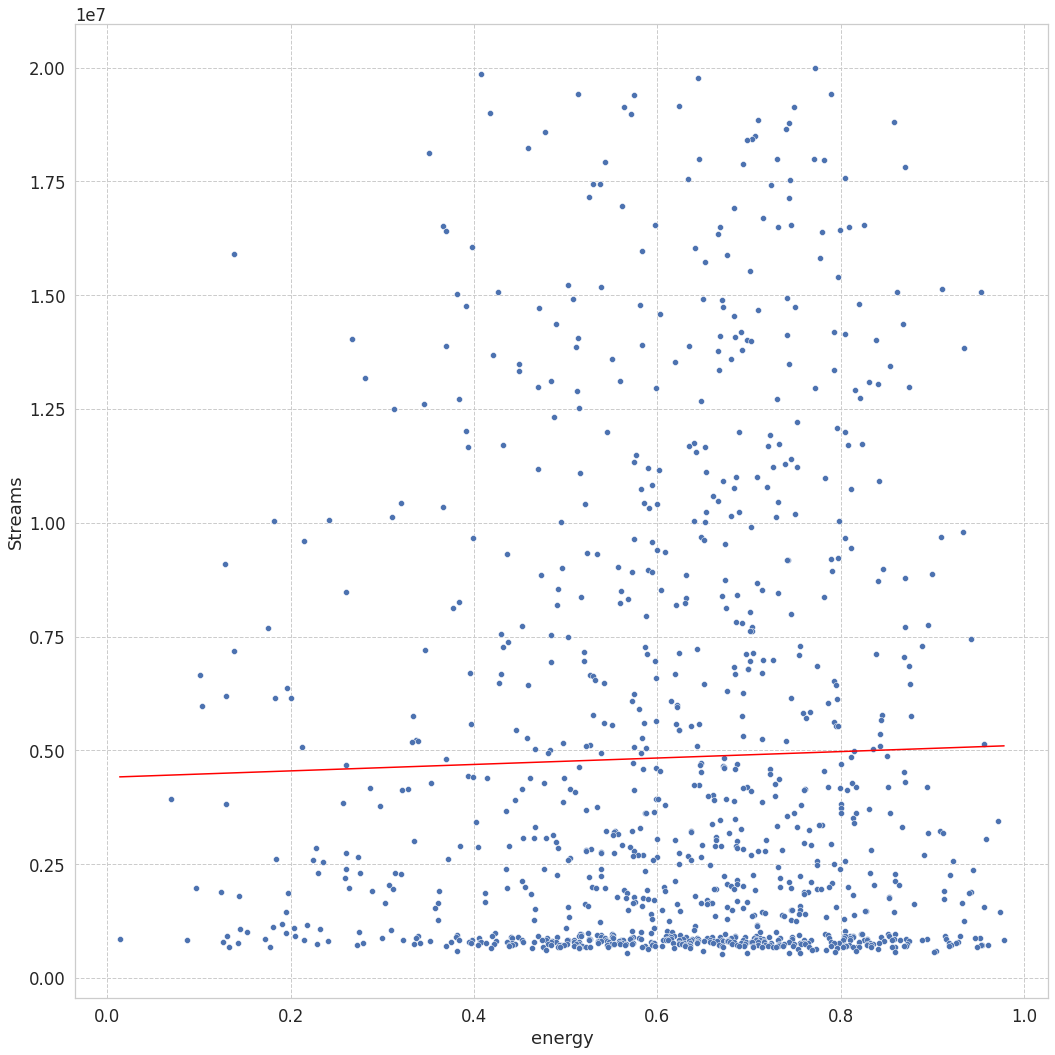

In [34]:
y = df2["Streams"]
x = df2["energy"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="energy", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 4905684.6475
beta_1 is: -438228.3441
R-square is: 0.0001


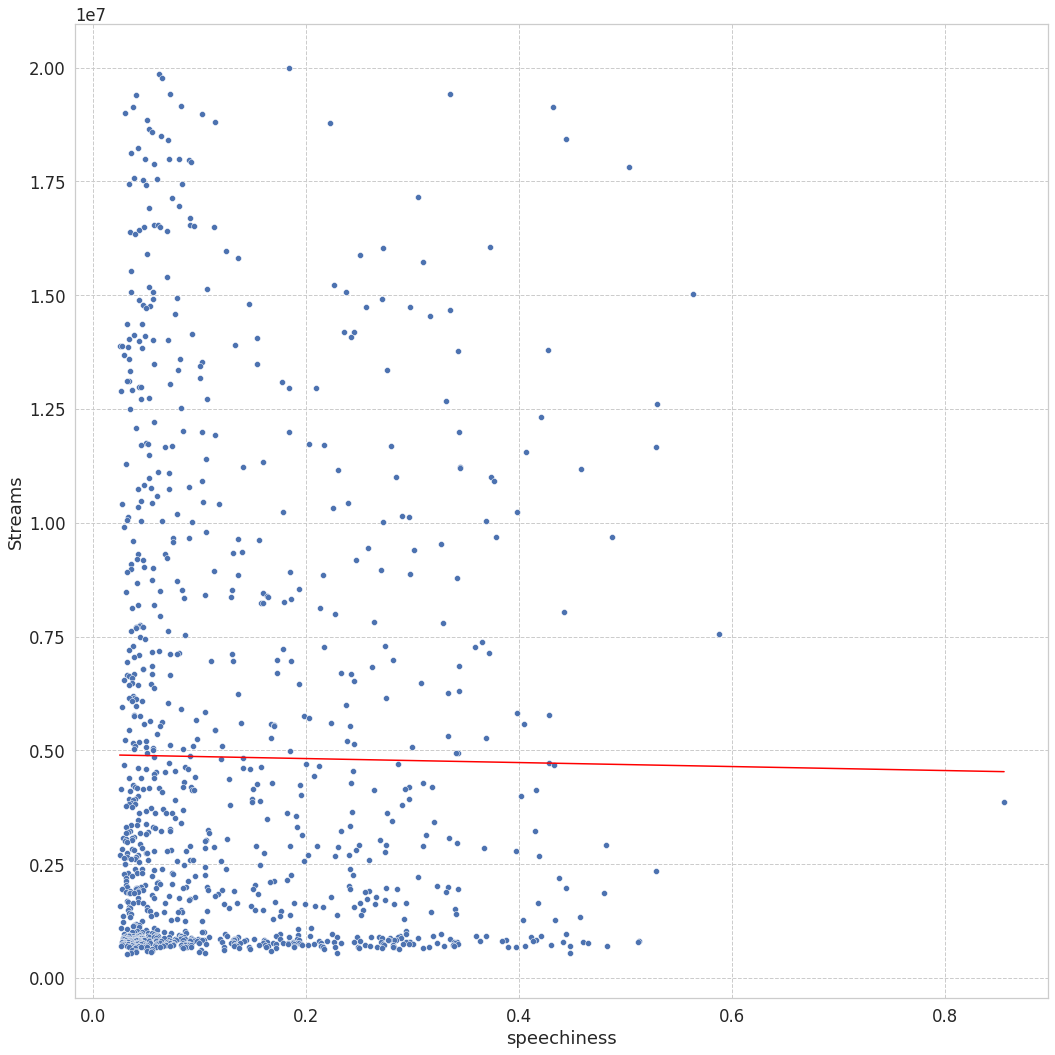

In [35]:
y = df2["Streams"]
x = df2["speechiness"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="speechiness", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 5519826.8716
beta_1 is: 101177.3133
R-square is: 0.0033


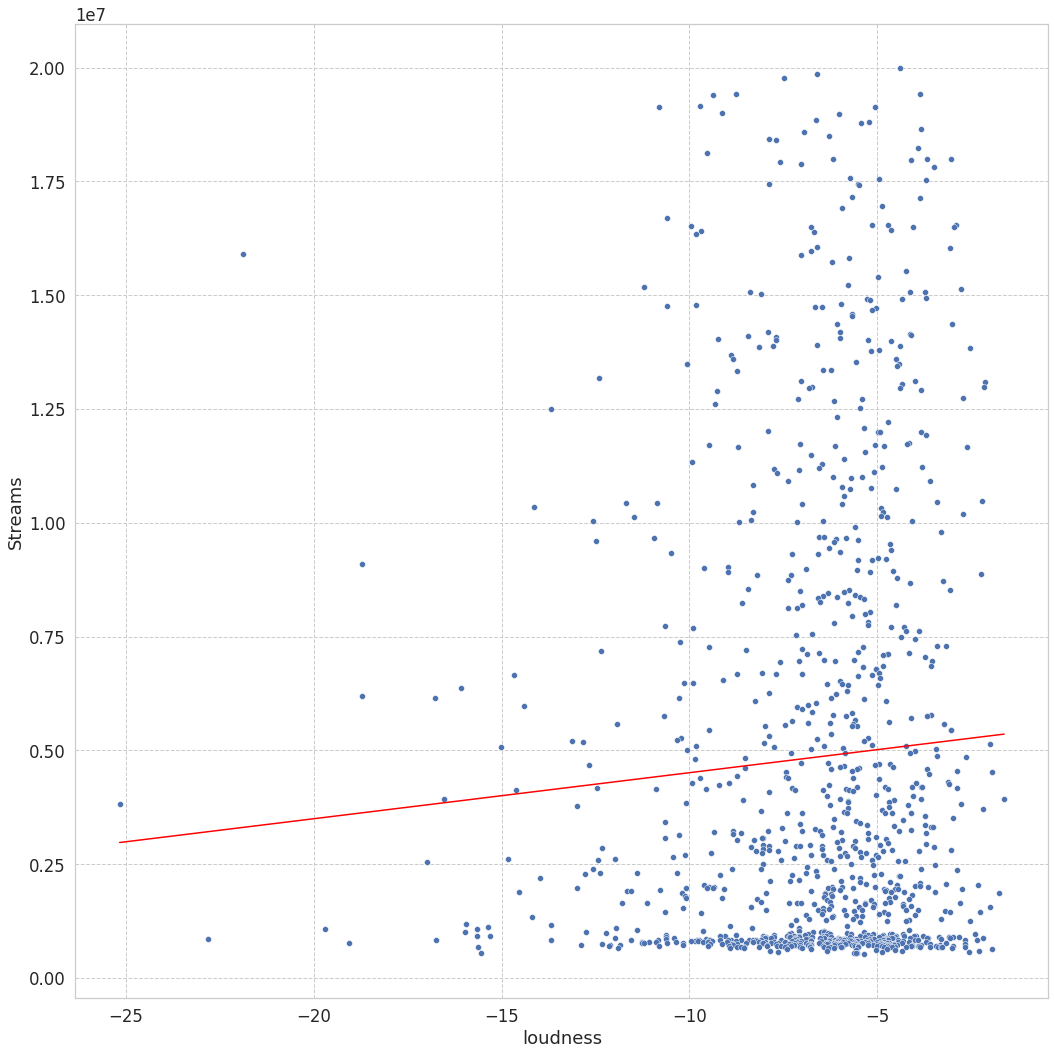

In [23]:
y = df2["Streams"]
x = df2["loudness"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="loudness", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 4393061.5740
beta_1 is: 951701.8152
R-square is: 0.0018


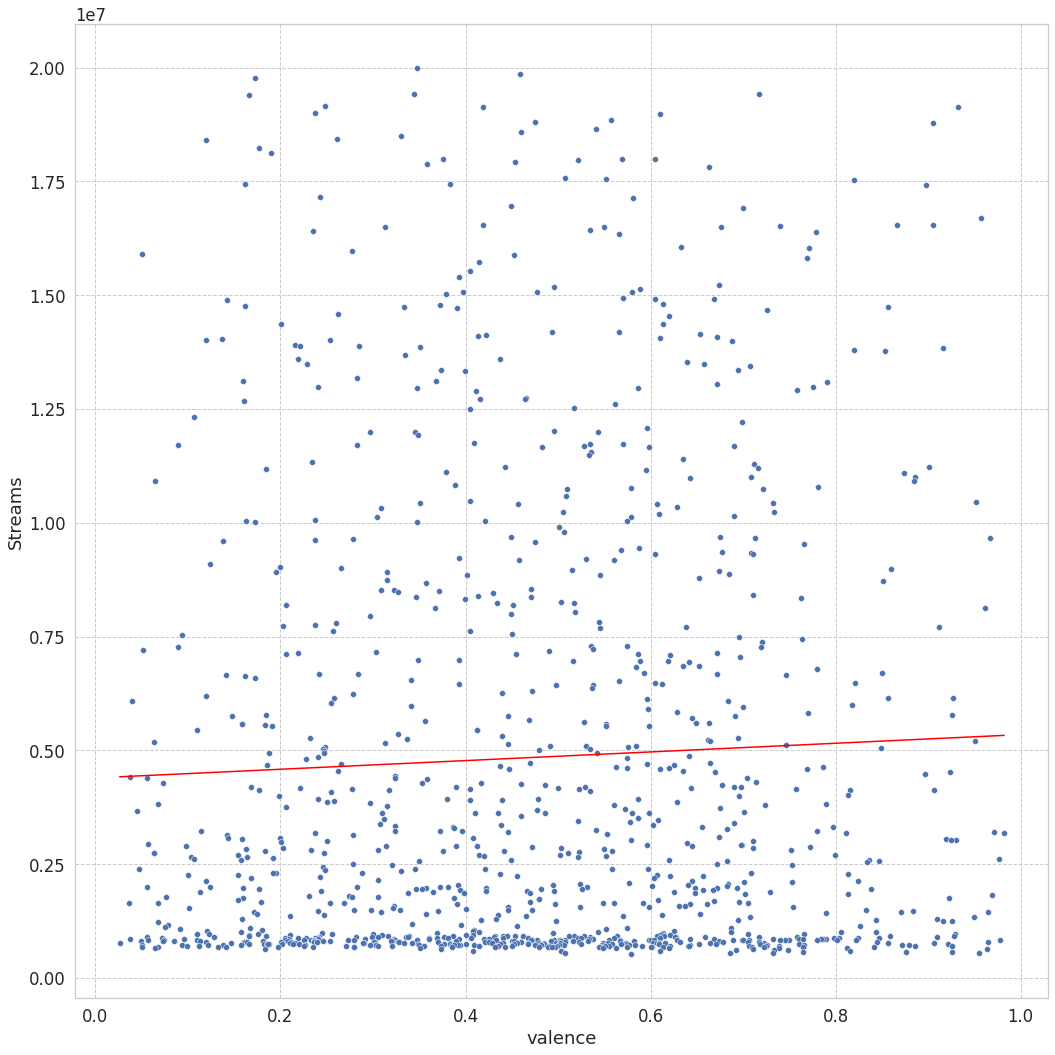

In [36]:
y = df2["Streams"]
x = df2["valence"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="valence", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 4964777.1104
beta_1 is: -968.7278
R-square is: 0.0000


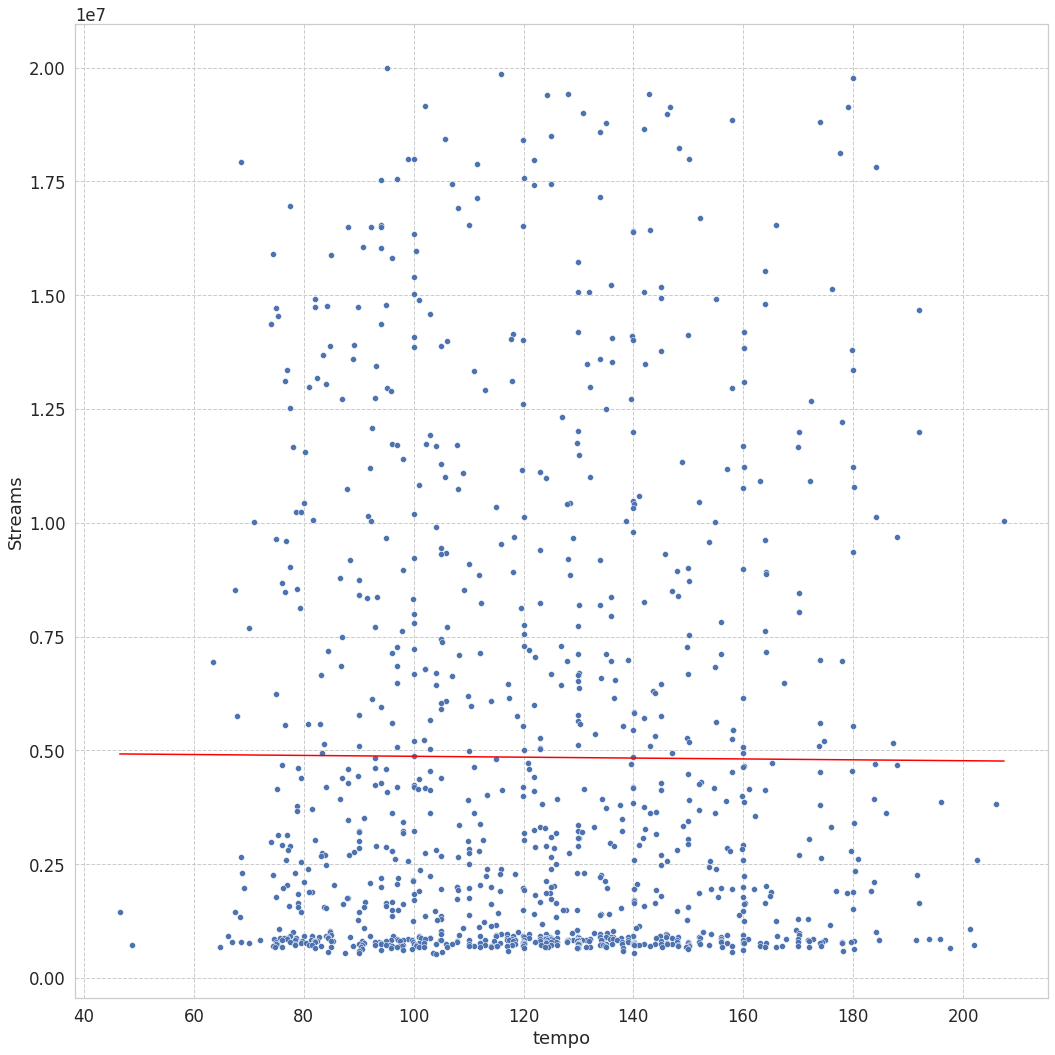

In [37]:
y = df2["Streams"]
x = df2["tempo"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="tempo", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 6151869.5232
beta_1 is: -6.3520
R-square is: 0.0071


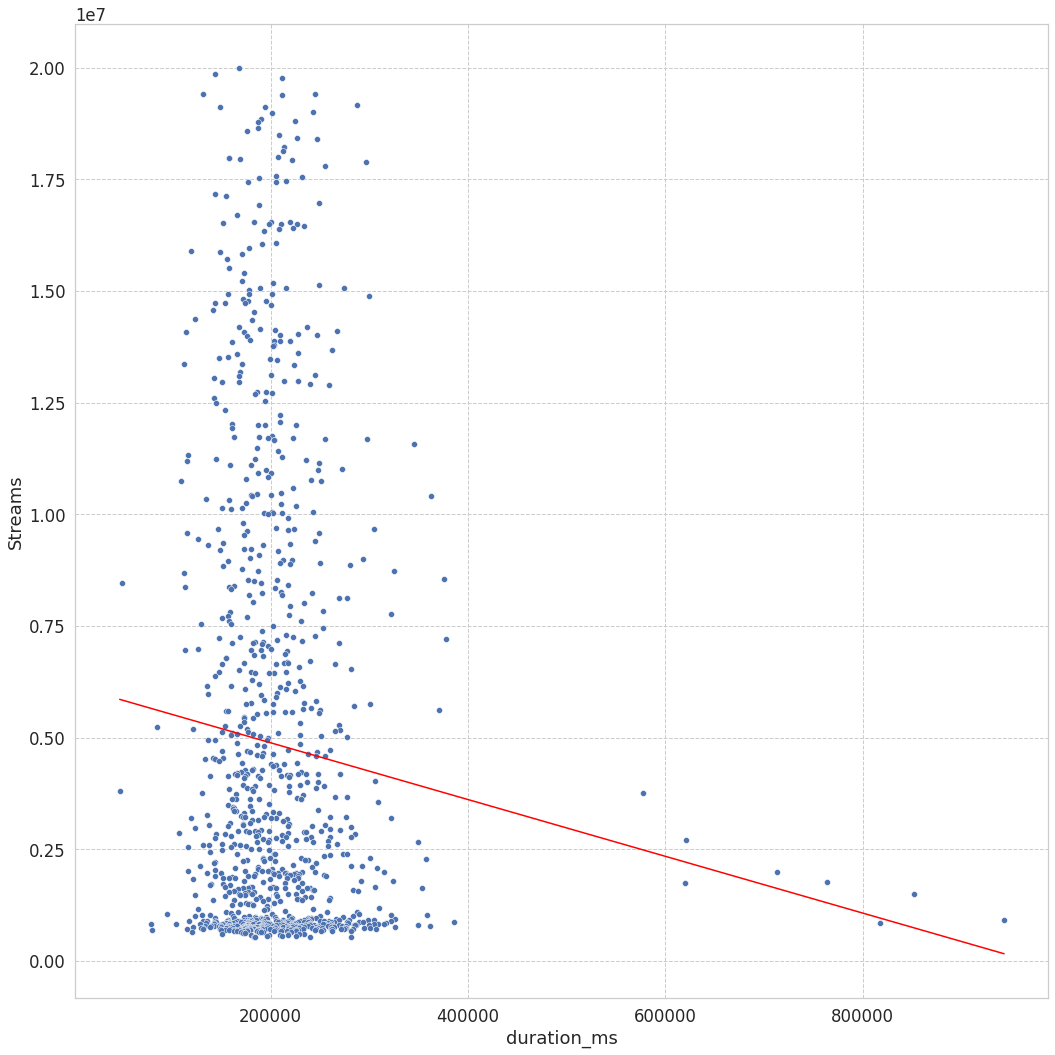

In [38]:
y = df2["Streams"]
x = df2["duration_ms"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="duration_ms", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: -3771733.6493
beta_1 is: 100431.1613
R-square is: 0.0256


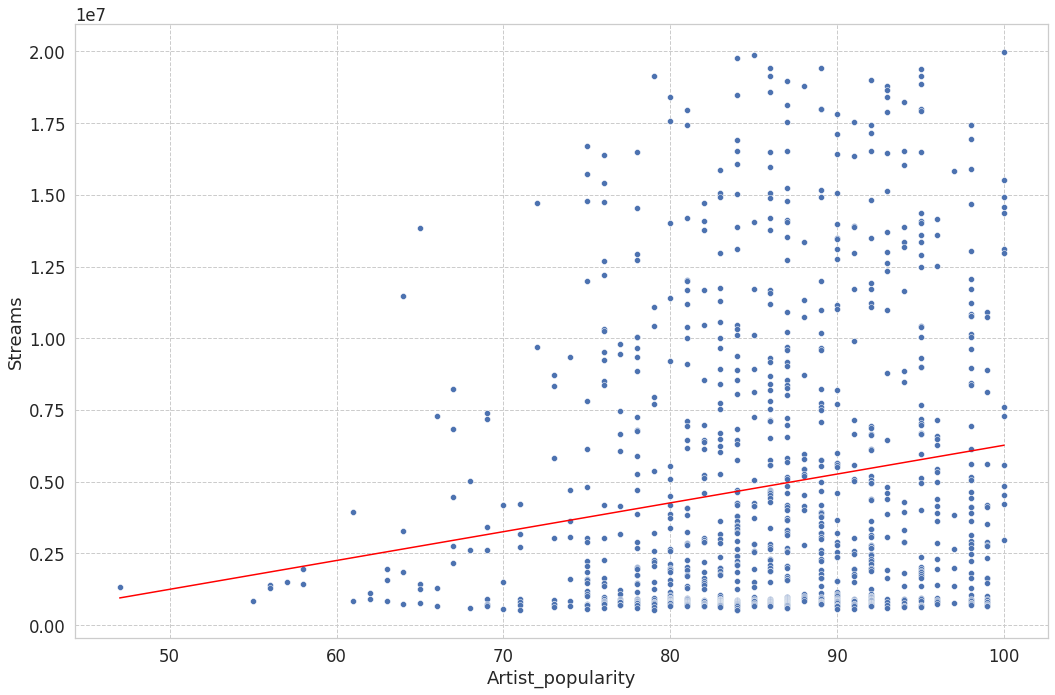

In [39]:
y = df2["Streams"]
x = df2["Artist_popularity"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 10))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="Artist_popularity", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

[[1.00000000e+00 1.68280000e+05 2.83181584e+10 4.76537970e+15
  8.01918095e+20]
 [1.00000000e+00 1.43227000e+05 2.05139735e+10 2.93815489e+15
  4.20823110e+20]
 [1.00000000e+00 2.11267000e+05 4.46337453e+10 9.42963747e+15
  1.99217122e+21]
 ...
 [1.00000000e+00 2.81667000e+05 7.93362989e+10 2.23464173e+16
  6.29424832e+21]
 [1.00000000e+00 2.40000000e+05 5.76000000e+10 1.38240000e+16
  3.31776000e+21]
 [1.00000000e+00 1.84326000e+05 3.39760743e+10 6.26267387e+15
  1.15437362e+21]]
[ 0.00000000e+00 -1.81970622e-08 -2.68598911e-05  3.47115347e-11
 -1.21518821e-17]
5715607.862887811


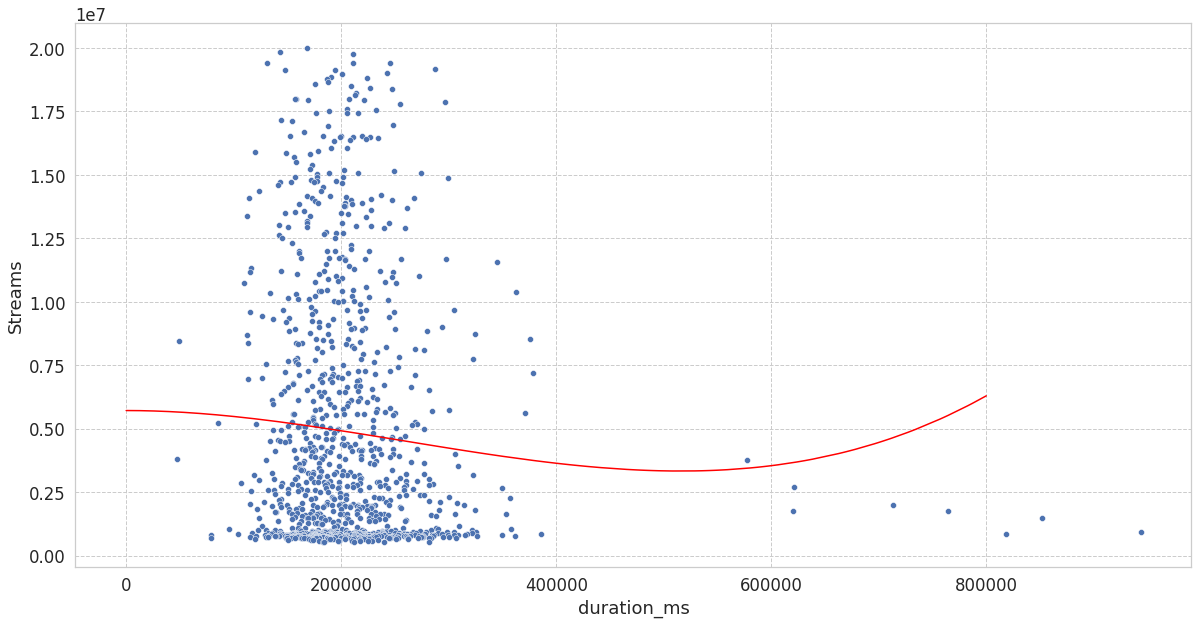

In [28]:
y = df2["Streams"]
x = df2["duration_ms"]
x_df=pd.DataFrame(x)
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
from sklearn import linear_model
poly = PolynomialFeatures(degree = 4) # our polynomial model is of order
x_poly = poly.fit_transform(x_df) # transforms the features to the polynomial form
print(x_poly)
model = linear_model.LinearRegression()
model = model.fit(x_poly,y)
coefficient = model.coef_
print(coefficient)
intercept = model.intercept_
print(intercept)
x_axis = np.arange(0,800000,100)
response= intercept + coefficient[1]* x_axis + coefficient[2] *x_axis**2 +coefficient[3] *x_axis**3 +coefficient[4] *x_axis**4 
plt.figure(figsize=(20, 10))
sns.scatterplot(x="duration_ms", y="Streams", data=df2)
plt.plot(x_axis, response, color= 'red')
plt.show() # prints our plot

[[1.00000000e+00 1.68280000e+05 2.83181584e+10 4.76537970e+15
  8.01918095e+20]
 [1.00000000e+00 1.43227000e+05 2.05139735e+10 2.93815489e+15
  4.20823110e+20]
 [1.00000000e+00 2.11267000e+05 4.46337453e+10 9.42963747e+15
  1.99217122e+21]
 ...
 [1.00000000e+00 2.81667000e+05 7.93362989e+10 2.23464173e+16
  6.29424832e+21]
 [1.00000000e+00 2.40000000e+05 5.76000000e+10 1.38240000e+16
  3.31776000e+21]
 [1.00000000e+00 1.84326000e+05 3.39760743e+10 6.26267387e+15
  1.15437362e+21]]
[ 0.00000000e+00 -1.81970622e-08 -2.68598911e-05  3.47115347e-11
 -1.21518821e-17]
5715607.862887811


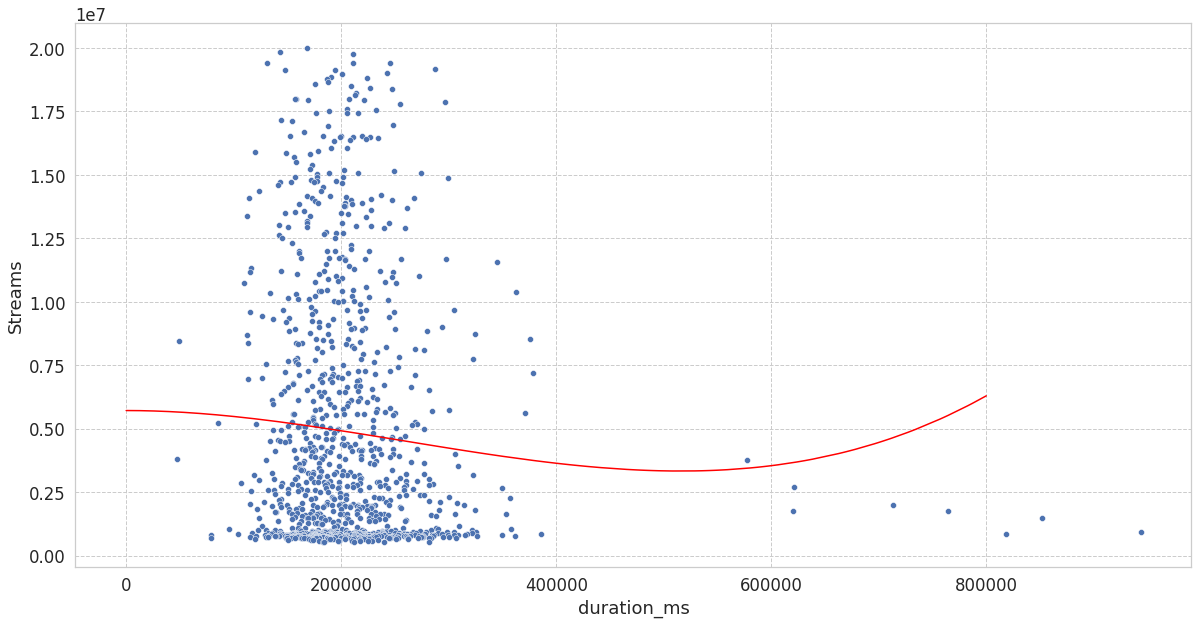

In [29]:
y = df2["Streams"]
x = df2["duration_ms"]
x_df=pd.DataFrame(x)
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
from sklearn import linear_model
poly = PolynomialFeatures(degree = 4) # our polynomial model is of order
x_poly = poly.fit_transform(x_df) # transforms the features to the polynomial form
print(x_poly)
model = linear_model.LinearRegression()
model = model.fit(x_poly,y)
coefficient = model.coef_
print(coefficient)
intercept = model.intercept_
print(intercept)
x_axis = np.arange(0,800000,100)
response= intercept + coefficient[1]* x_axis + coefficient[2] *x_axis**2 +coefficient[3] *x_axis**3 +coefficient[4] *x_axis**4 
plt.figure(figsize=(20, 10))
sns.scatterplot(x="duration_ms", y="Streams", data=df2)
plt.plot(x_axis, response, color= 'red')
plt.show() # prints our plot

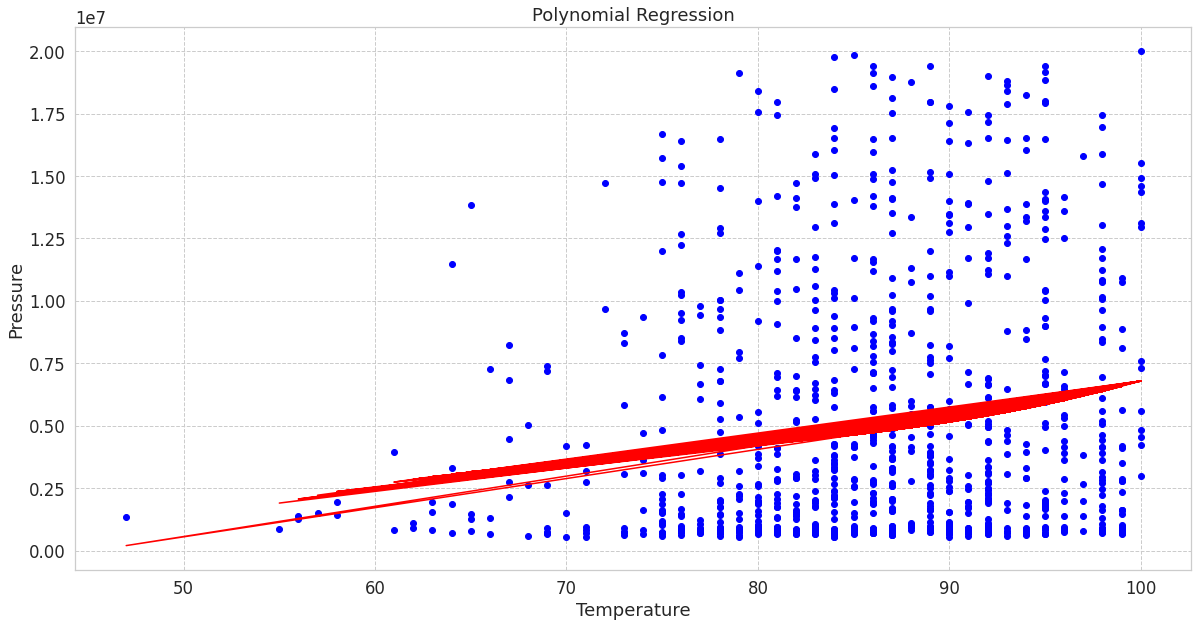

In [30]:
y = df2["Streams"]
x = df2["Artist_popularity"]
#X = df2.iloc[:, 12].values # extracts features from the dataset
#y = df2.iloc[:, 0].values # extracts the labels from the data
x_df=pd.DataFrame(x)
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(x_df)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
plt.figure(figsize=(20, 10))
plt.scatter(x, y, color = 'blue')
  
plt.plot(x, lin2.predict(poly.fit_transform(x_df)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

In [31]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
# from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
# poly_regr = PolynomialFeatures(degree = 4) # our polynomial model is of order
# X_poly = poly_regr.fit_transform(x) # transforms the features to the polynomial form
# lin_reg_2 = LinearRegression() # creates a linear regression object
# lin_reg_2.fit(X_poly, y) # fits the linear regression object to the polynomial features

ValueError: ignored

In [ ]:
y = df2["Streams"]
x = df2["danceability"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")

plt.figure(figsize=(15, 15))
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="danceability", y="Streams", data=df2)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()
